<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/18%20-%20Pandas%20et%20S%C3%A9ries%20Temporelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18/30 Pandas et séries temporelles

## 1. Travailler avec des séries Temporelles - ici df = dataframe = nommé bitcoin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bitcoin = pd.read_csv('data/BTC-EUR.csv') # on charge le dataframe
bitcoin.head() # on visualise les entêtes -> on voit les index de la dataframe de 0, 1, 2 etc...
# bitcoin = bitcoin.set_index('Date')   #  change l'index frame de bitcoin par sa time series MAIS APPORTE PB DE RESAMPLE ET AUTRES LECTURES DE TIMES-INDEX

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
1,2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2,2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
3,2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
4,2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


In [3]:
bitcoin.index  # -> affiche le tableau des index_dataframe = RangeIndex(start=0, stop=2923, step=1)

RangeIndex(start=0, stop=2923, step=1)

In [4]:
bitcoin = pd.read_csv('data/BTC-EUR.csv', index_col='Date', parse_dates=True)   # on charge le dataframe ET on met en index_df les dates !
bitcoin.head()   # on regarde un aperçu du tableau avec en-têtes
# bitcoin.index   # ou bien ON REGARDE LE CHANGEMENT DES INDEXS

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


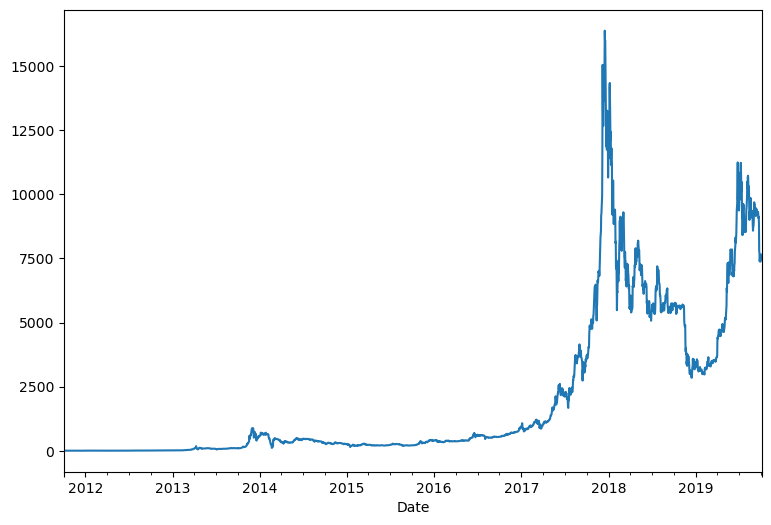

In [5]:
bitcoin['Close'].plot(figsize=(9, 6))  # on affiche un courbe plot pour la colonne 'close'
plt.show()

In [6]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

<AxesSubplot:xlabel='Date'>

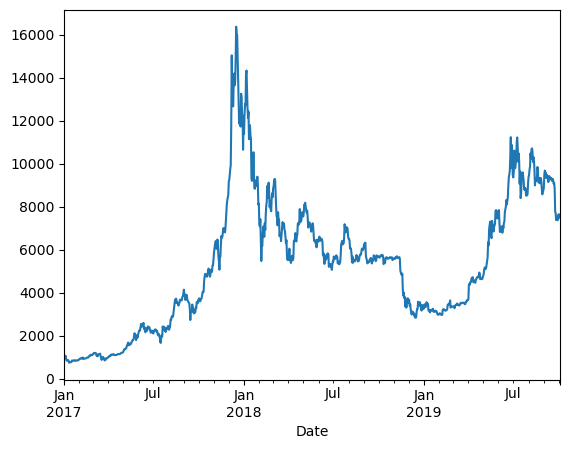

In [7]:
bitcoin.loc['2017':'2019','Close'].plot()

## 2. Resample

In [8]:
bitcoin.loc['2019']['Close']

Date
2019-01-01    3372.090088
2019-01-02    3468.399902
2019-01-03    3345.330078
2019-01-04    3370.939941
2019-01-05    3359.159912
                 ...     
2019-09-30    7626.029785
2019-10-01    7625.560059
2019-10-02    7655.250000
2019-10-03    7516.790039
2019-10-04    7487.083496
Name: Close, Length: 277, dtype: float64

In [9]:
type(bitcoin.loc['2019':'2020', 'Close'])

pandas.core.series.Series

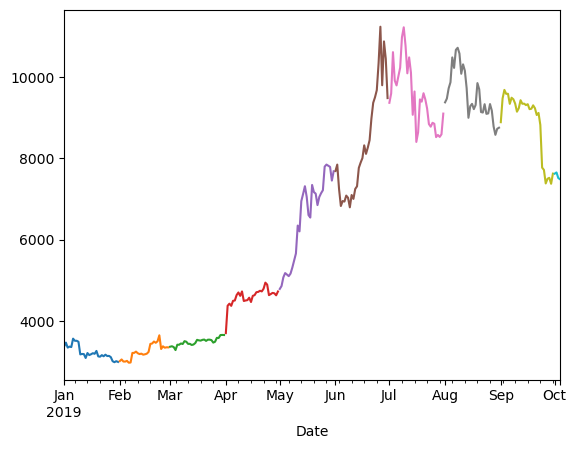

In [10]:
bitcoin.loc['2019':'2020', 'Close'].resample('M').plot()
plt.show()

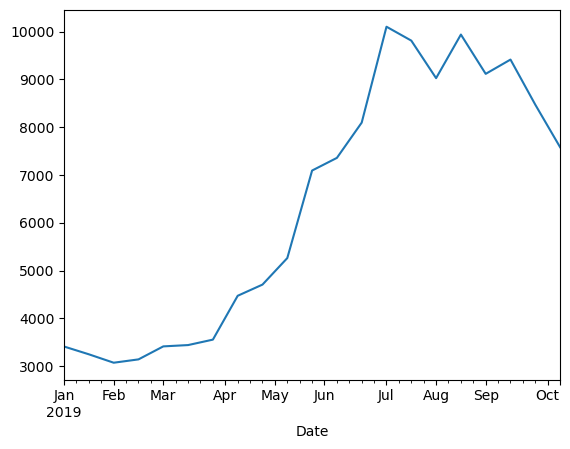

In [11]:
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot()
plt.show()

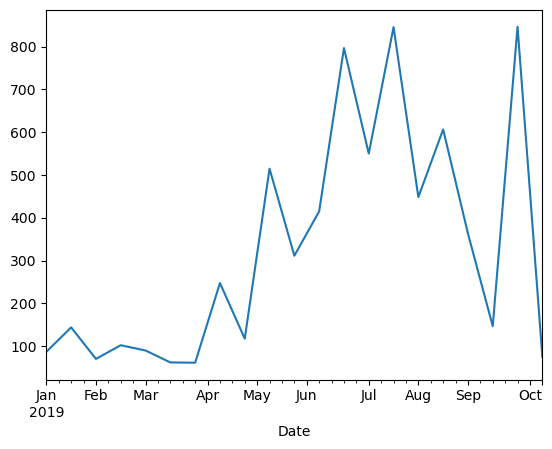

In [12]:
bitcoin.loc['2019', 'Close'].resample('2W').std().plot()
plt.show()

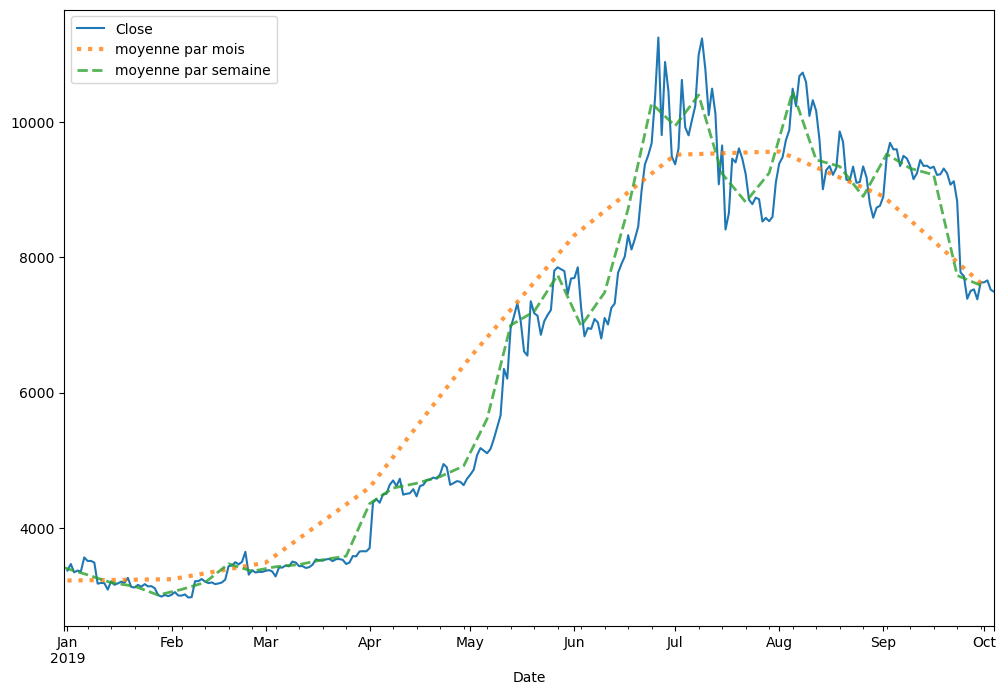

In [13]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

## 3. Aggregate

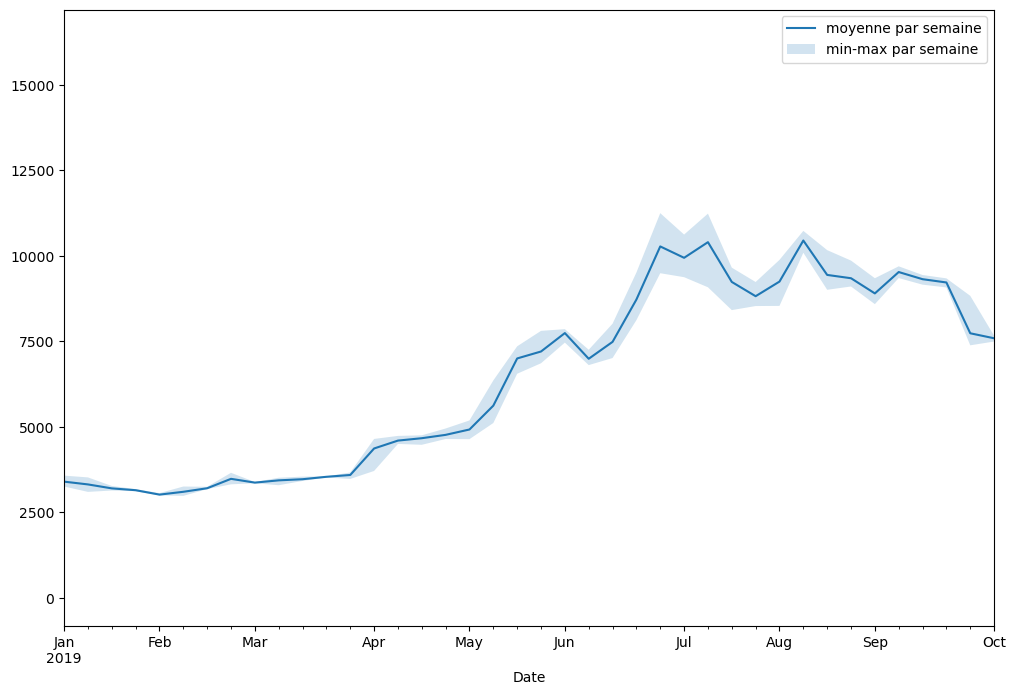

In [14]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

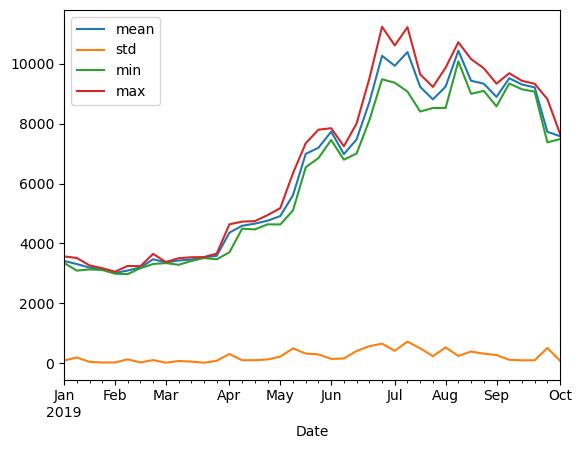

In [15]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

## 4. Moving Average et EWM

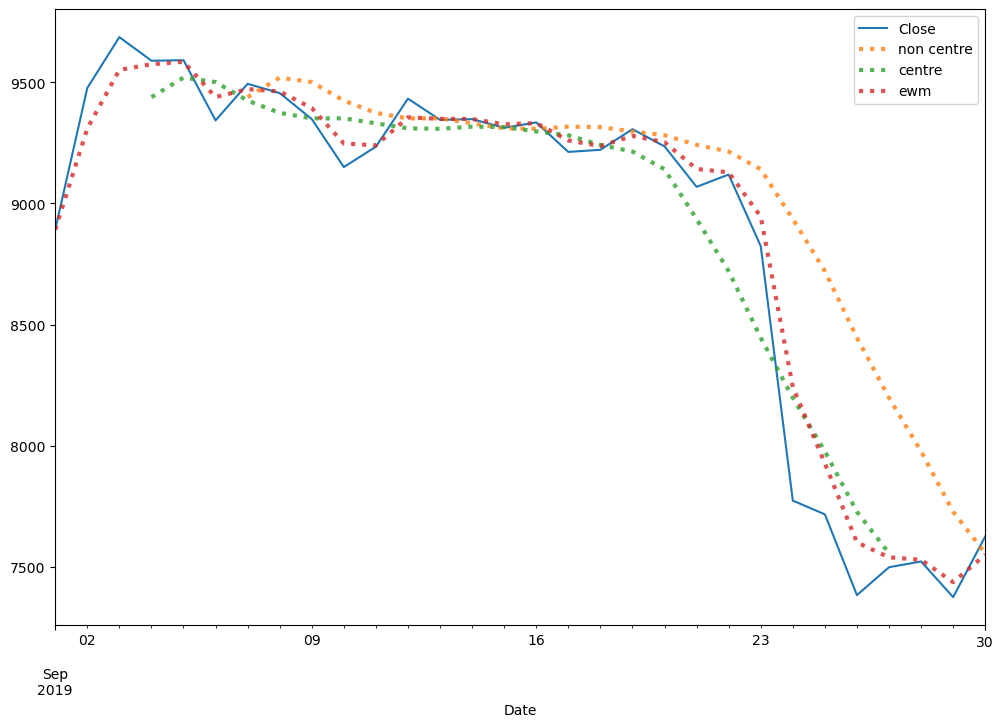

In [16]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09', 'Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

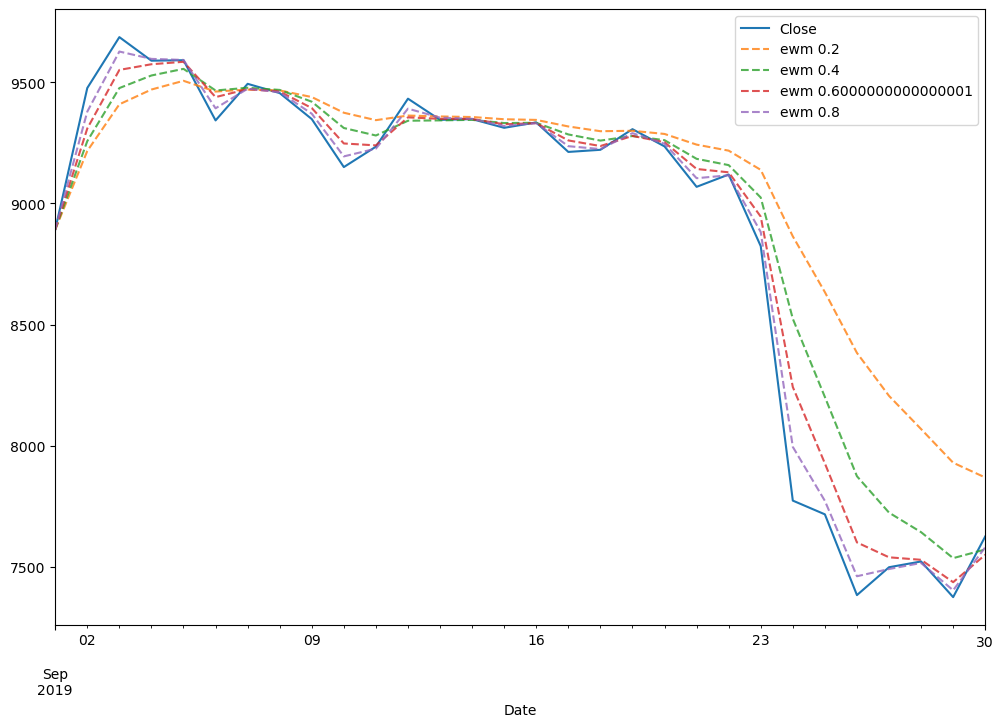

In [17]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)
plt.legend()
plt.show()

## 5. Comparaison de 2 série temporelles

In [19]:
ethereum = pd.read_csv('data/ETH-EUR.csv', index_col='Date', parse_dates=True)

In [20]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

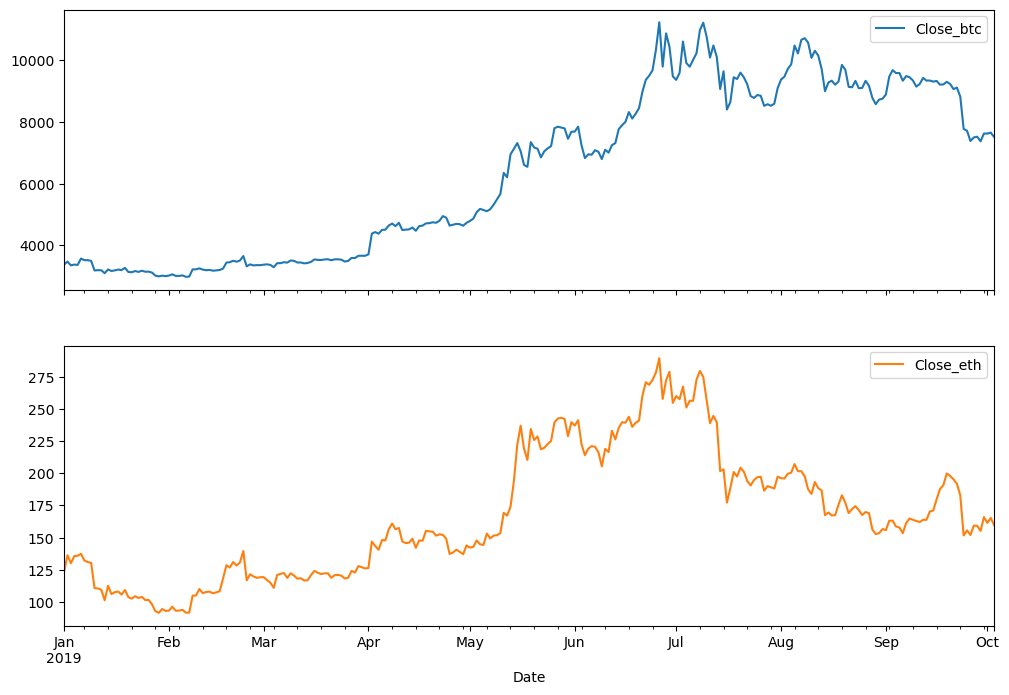

In [21]:
btc_eth.loc['2019', ['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

## 6. Exercice et Solution
### acheter ou vendre apres 28 j de hausse ou de baisse

In [22]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [23]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()  # on créé une colonne 'rolling' où on cherche dans une fenetre le 28 j le maximum, shift(1) pour décider 1 jour avant
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1  # si cette fenetre créé ci-dessus est < que la donnée de cloture alors on achète
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

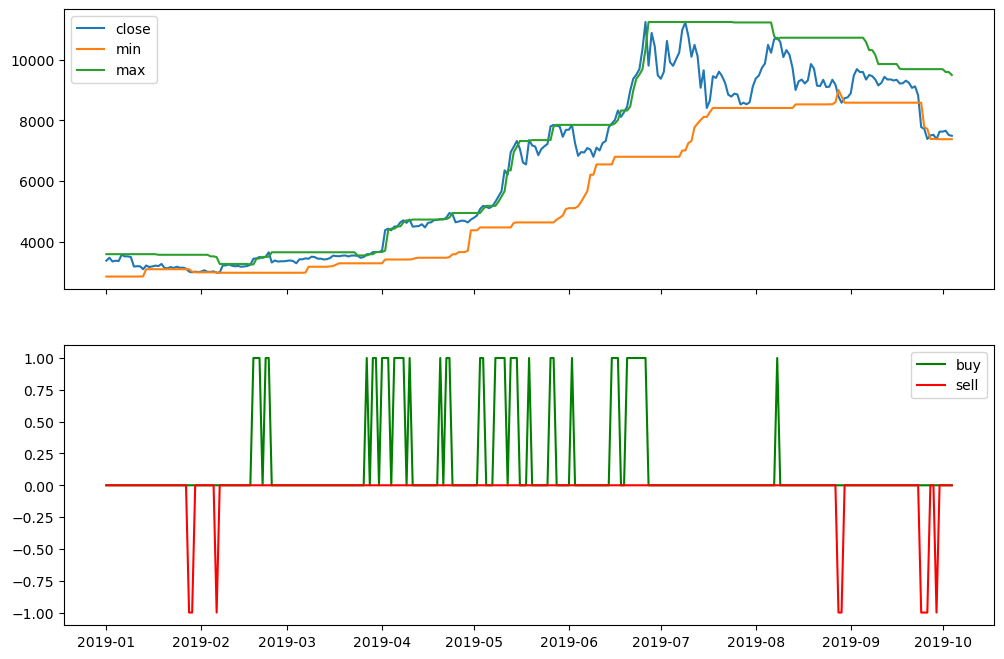

In [24]:
start ='2019'
end='2019'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])